**Toronto Airbnb Dataset**

This project (Write a Data Science Blog Post) is part of Udacity Data Scientist Nanodegree Program. I used Toronto Airbnb Dataset for this project which will be solved using the CRISP-DM Process:

- 1. Business Understanding
- 2. Data Understanding
- 3. Data Preparation
- 4. Data Modeling
- 5. Evaluate the Results

The dataset describes the listing activities. The original dataset can be found here: https://www.kaggle.com/robinkongninglo/toronto-airbnb-dataset

**Section 1: Business Understanding**

**Business Questions**

1. What are the most common amenities in the dataset?
2. Which neighborhoods have the highest number of listings and rating review scores?
3. What is the relationship between the type of room and price listing?
4. What are the most influential features of the dataset to predict the price of a listing?

**Installing and Importing Python Libraries**

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter
from pylab import *


import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

# interactive map library
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster


**Section 2: Data Understanding**

**Gather**

In [48]:
# Gather the data
df_list = pd.read_csv('listings_sep_09_2020.csv')

In [49]:
df_list.shape

(19343, 74)

In [50]:
# check columns
df_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

We see a lot of columns in the dataset and most of them do not contribute to our objective. Therefore, they can be dropped straight up. So let's just keep the columns that are of interest. 

**Section 3: Data Preparation**

In [51]:
# Cleaning data - Drops columns that are likely irrelevant to this analysis
df_list.drop(['id', 'listing_url', 'last_scraped', 'scrape_id','picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'description', 'neighborhood_overview', 'host_about', 'host_acceptance_rate', 'license', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'minimum_nights', 'host_identity_verified', 'neighbourhood_group_cleansed', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'bathrooms','instant_bookable', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'neighbourhood', 'first_review','last_review','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','has_availability', 'availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review', 'calendar_updated','review_scores_accuracy','reviews_per_month'], axis=1, inplace=True)


In [52]:
df_list.head()

,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_30,number_of_reviews,review_scores_rating
0,Beautiful home in amazing area!,Little Portugal,43.64617,-79.42451,Entire house,Entire home/apt,10,3 baths,5.0,7.0,"[""Shampoo"", ""TV"", ""Dryer"", ""Indoor fireplace"",...",$469.00,0,7,100.0
1,Downtown Harbourfront Private Room,Waterfront Communities-The Island,43.64105,-79.37628,Private room in apartment,Private room,2,1.5 baths,1.0,1.0,"[""Shampoo"", ""TV"", ""Pool"", ""Gym"", ""Free parking...",$99.00,30,169,97.0
2,Seaton Village Parlour Bedroom,Annex,43.66724,-79.41598,Private room in house,Private room,1,1.5 baths,1.0,1.0,"[""Indoor fireplace"", ""Wifi""]",$66.00,0,0,NaN
3,Queen Bedroom close to downtown,Briar Hill-Belgravia,43.69602,-79.45468,Private room in house,Private room,3,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$70.00,0,217,95.0
4,World Class downtown @CN Tower Theatre MTCC ga...,Waterfront Communities-The Island,43.64530,-79.38940,Entire condominium,Entire home/apt,5,1 bath,1.0,2.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$135.00,23,40,95.0


In [53]:
df_list.dtypes

name                       object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
availability_30             int64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [54]:
# displays the data types and the number of these data types in the dataset
df_list.dtypes.value_counts()

object     7
float64    5
int64      3
dtype: int64

In [55]:
# displays columns with missing values
df_list.isnull().sum().sort_values(ascending=False)

review_scores_rating      4333
bedrooms                  1429
beds                       196
bathrooms_text              13
name                         1
number_of_reviews            0
availability_30              0
price                        0
amenities                    0
accommodates                 0
room_type                    0
property_type                0
longitude                    0
latitude                     0
neighbourhood_cleansed       0
dtype: int64

**What are the most common amenities in Toronto Airbnbs?**

**Analyzing the Data**

In [56]:
# remove "", [, and ] from string within string amenities list
df_list.amenities = df_list.amenities.str.replace("[{}]", "").str.replace('"', "")
df_list.amenities = df_list.amenities.str.replace("[{}]", "").str.replace("[", "")
df_list.amenities = df_list.amenities.str.replace("[{}]", "").str.replace("]", "")
df_list['amenities'].head()

0    Shampoo, TV, Dryer, Indoor fireplace, Fire ext...
1    Shampoo, TV, Pool, Gym, Free parking on premis...
2                               Indoor fireplace, Wifi
3    Carbon monoxide alarm, Private entrance, Kitch...
4    Carbon monoxide alarm, Private entrance, Kitch...
Name: amenities, dtype: object

**Visualize the Data**

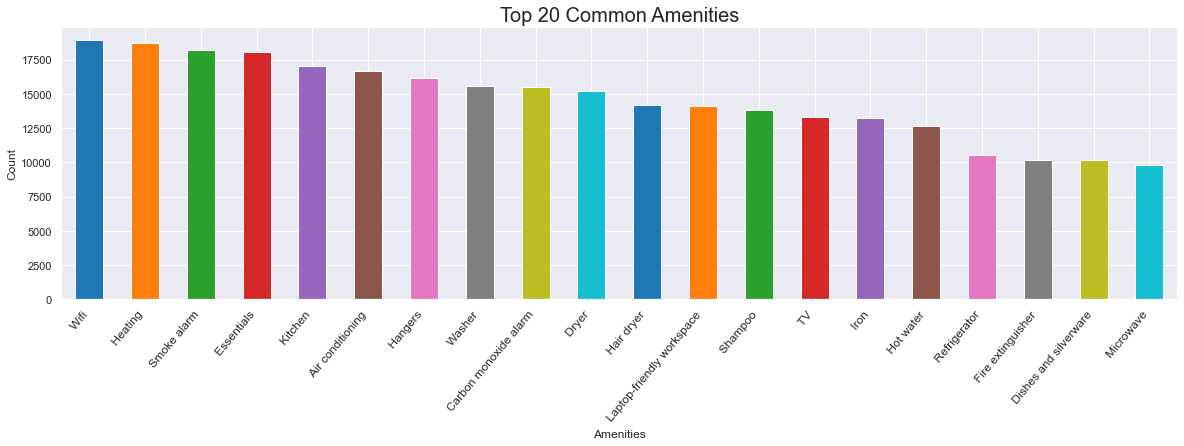

In [57]:
# display Top 20 common amenities with bargraph
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# concatenate amenities, separate by comma, and count values
pd.Series(np.concatenate(df_list['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(figsize=(20,5), kind='bar', color=colors)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right', fontsize=12)
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.title('Top 20 Common Amenities', size=20)
plt.show();

In the above chart you can see that the most common amenities in Toronto listings are:

- Wifi
- Heating
- Smoke Alarm
- Essentials
- Kitchen

**Examining Neighborhood Frequency**

In [58]:
# analyze the top 20 frequency of each listing based on neighborhood
top_niegh = df_list['neighbourhood_cleansed'].value_counts().head(20)
top_niegh

Waterfront Communities-The Island      3291
Niagara                                 836
Annex                                   630
Church-Yonge Corridor                   628
Bay Street Corridor                     584
Kensington-Chinatown                    529
Dovercourt-Wallace Emerson-Junction     509
Moss Park                               484
Trinity-Bellwoods                       478
Willowdale East                         473
Little Portugal                         412
South Riverdale                         374
Palmerston-Little Italy                 352
South Parkdale                          314
Mount Pleasant West                     253
Mimico (includes Humber Bay Shores)     242
Cabbagetown-South St.James Town         233
Roncesvalles                            225
North St.James Town                     203
Newtonbrook West                        195
Name: neighbourhood_cleansed, dtype: int64

**Which Neighbourhood has the most Airbnb listings?**

[Text(0, 0, 'Waterfront Communities-The Island'),
 Text(1, 0, 'Niagara'),
 Text(2, 0, 'Annex'),
 Text(3, 0, 'Church-Yonge Corridor'),
 Text(4, 0, 'Bay Street Corridor'),
 Text(5, 0, 'Kensington-Chinatown'),
 Text(6, 0, 'Dovercourt-Wallace Emerson-Junction'),
 Text(7, 0, 'Moss Park'),
 Text(8, 0, 'Trinity-Bellwoods'),
 Text(9, 0, 'Willowdale East'),
 Text(10, 0, 'Little Portugal'),
 Text(11, 0, 'South Riverdale'),
 Text(12, 0, 'Palmerston-Little Italy'),
 Text(13, 0, 'South Parkdale'),
 Text(14, 0, 'Mount Pleasant West'),
 Text(15, 0, 'Mimico (includes Humber Bay Shores)'),
 Text(16, 0, 'Cabbagetown-South St.James Town'),
 Text(17, 0, 'Roncesvalles'),
 Text(18, 0, 'North St.James Town'),
 Text(19, 0, 'Newtonbrook West')]

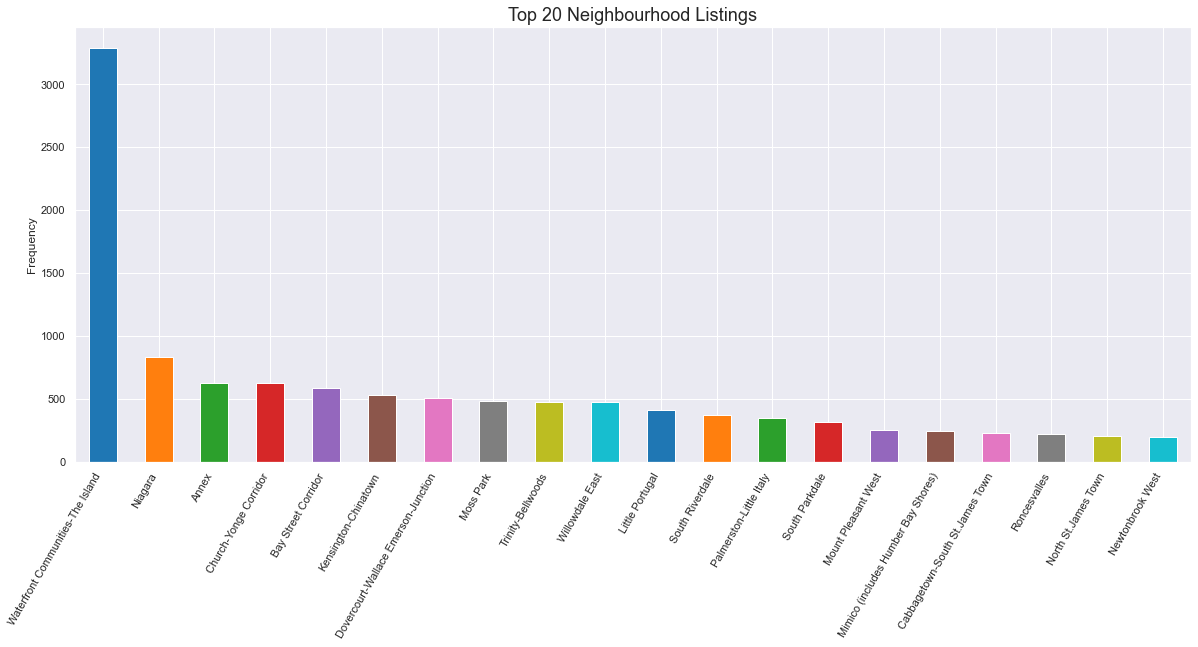

In [59]:
# Create a bargraph to analyze the number of listing in neighbourhood
sns.set(rc={'figure.figsize':(20,8)})
bgraph = top_niegh.plot(kind='bar', color = colors)
bgraph.set_title('Top 20 Neighbourhood Listings', size=18)
bgraph.set_ylabel('Frequency')
bgraph.set_xticklabels(bgraph.get_xticklabels(), rotation=60, ha='right')

It looks like Waterfront Communities-The Island has the most listings, followed by Niagara, and then Annex. We will now analyze which neighborhoods have the highest rating review score and highest listing price.

**Which neighbourhoods have the highest rating review scores?**

In [60]:
# groups a dataframe by "neighbourhood_group_cleansed" and displays a chart with the means of "review_scores_rating"
neigh_rating = df_list.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)
neigh_rating

neighbourhood_cleansed
Forest Hill South           97.500000
Ionview                     97.038462
High Park-Swansea           97.021583
Humber Heights-Westmount    97.000000
Woodbine-Lumsden            96.926829
                              ...    
Westminster-Branson         89.444444
Agincourt North             89.391304
Maple Leaf                  89.214286
Rexdale-Kipling             84.952381
Black Creek                 81.700000
Name: review_scores_rating, Length: 140, dtype: float64

Text(0, 0.5, 'Rating')

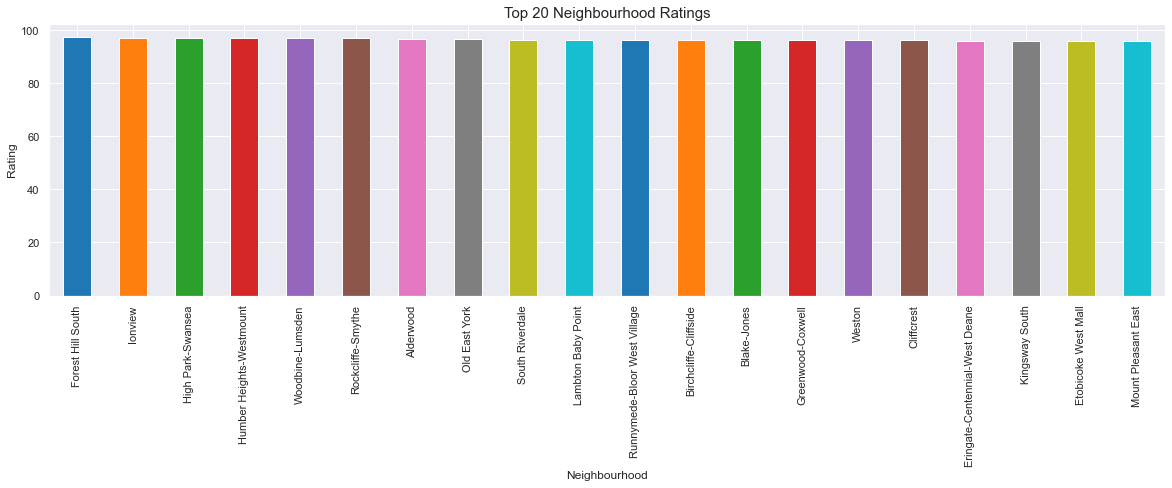

In [61]:
# plot bar graph dispalying top 20 neighbourhood ratings
neigh_rating[:20].plot.bar(figsize=(20,5), color=colors)
plt.title('Top 20 Neighbourhood Ratings', size=15)
plt.xlabel('Neighbourhood')
plt.ylabel('Rating')

It looks like Forest Hill South, Ionview, and High Park-Swansea have the highest review score ratings. However, there isn't much variance/difference in the top 20 review score ratings

**Which neighbourhoods have the highest listing prices?**

In [62]:
# remove $ and , from price
df_list['price'] = df_list['price'].replace({'\$':''}, regex = True)
df_list['price'] = df_list['price'].replace({'\,':''}, regex = True)
# change 'price' from object to float type
df_list['price'] = df_list['price'].astype(float)

In [63]:
# removed listings of prices that were greater than $600 or $0 as they are most likely outliers
df_list.drop(df_list[df_list['price'] >= 600].index, inplace = True)
df_list.drop(df_list[df_list['price'] <= 0].index, inplace = True)

Text(0, 0.5, 'Price($)')

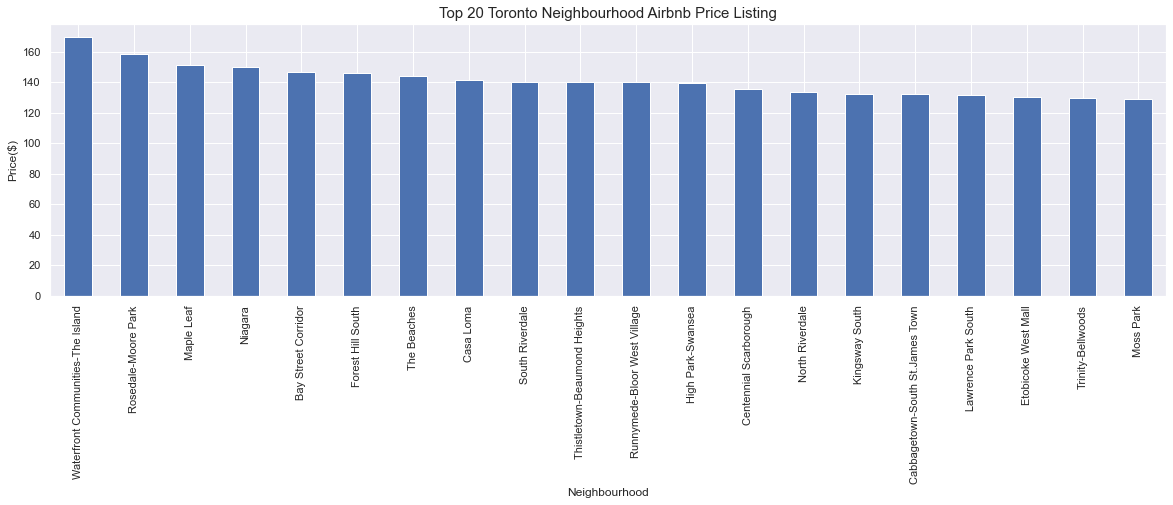

In [64]:
# # groups a dataframe by "neighbourhood_group_cleansed" and displays a chart with the means of "price_listing"
neigh_price = df_list.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
neigh_price[:20].plot.bar(figsize=(20,5))
plt.title('Top 20 Toronto Neighbourhood Airbnb Price Listing', size=15)
plt.xlabel('Neighbourhood')
plt.ylabel('Price($)')

Waterfront Communities-The Island, Rosedale-Moor Park and Maple leaf have the highest listing prices.

**What is the relationship between room type and price?**

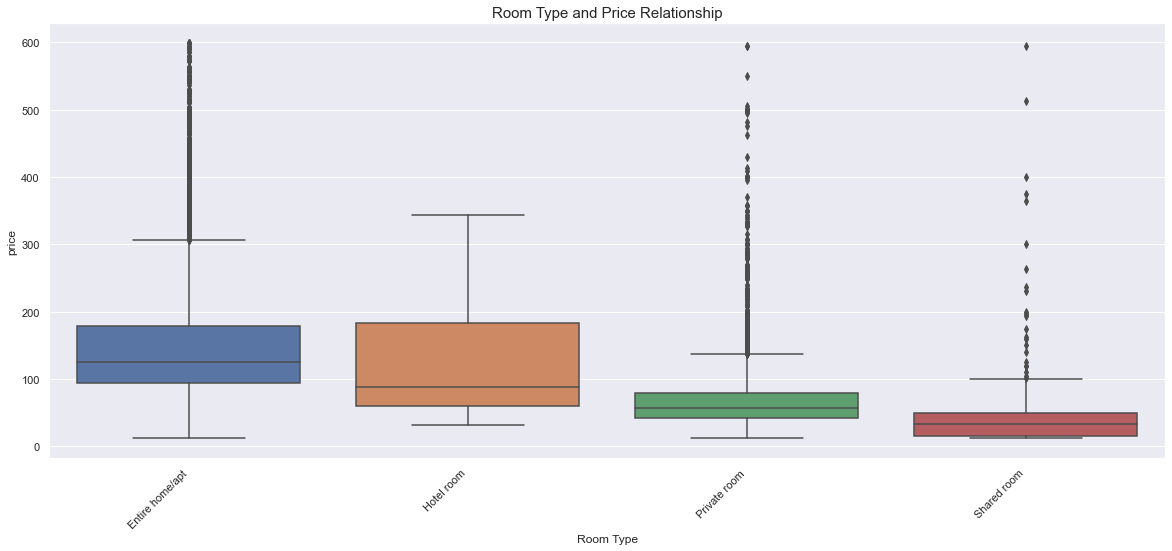

In [65]:
# group by room type and price
sort_price = df_list.groupby('room_type')['price'].median().sort_values(ascending=False).index

# create boxplot 
sns.boxplot(y='price', x='room_type', data=df_list, order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Room Type and Price Relationship', size=15)
plt.xlabel('Room Type')
plt.show();

The boxplot data clearly indicates that entire home/apt has the highest median price compared to the other room type listing. Shared room is at the lowest median.

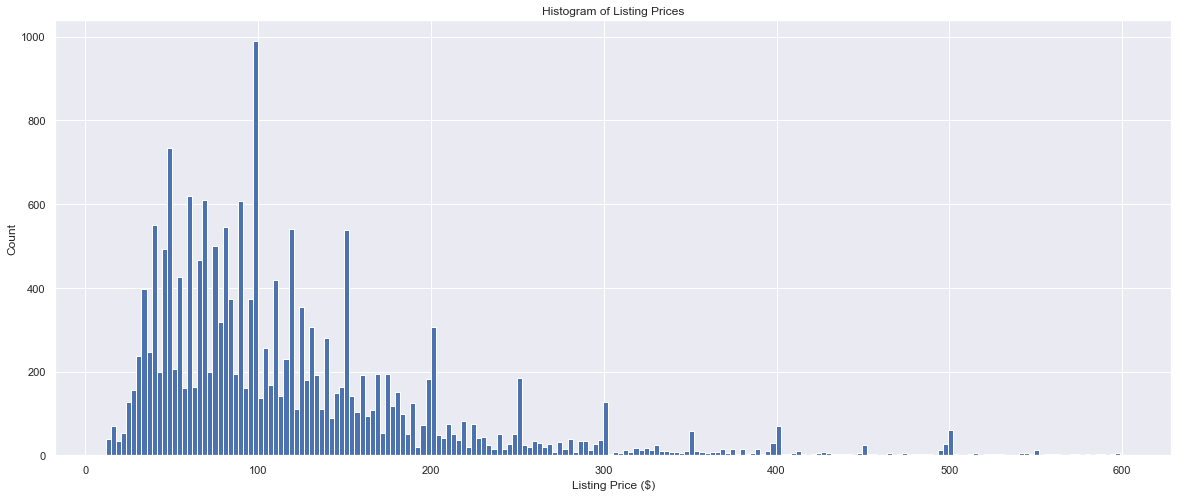

In [66]:
df_list.price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing Price ($)')
plt.title('Histogram of Listing Prices');

**Map Visualizations**

In [67]:
# Display heatmap of listings in Toronto
Tor_map = folium.Map([43.64617,-79.42451],zoom_start=11)
HeatMap(df_list[['latitude','longitude']],radius=10).add_to(Tor_map)
display(Tor_map)

In [68]:
# displays a cluster map
cluster_map = folium.Map([43.64617,-79.42451],zoom_start=11)
FastMarkerCluster(df_list[['latitude','longitude']],radius=10).add_to(cluster_map)
cluster_map

**Further Data Preparation for modeling**

**Term document matrix for amenities feature**

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# split based on , in amenities and create array
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(df_list['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())


In [70]:
df_amenities.head()

,,air conditioning,baby bath,baby monitor,babysitter recommendations,baking sheet,barbecue utensils,bathroom essentials,bathtub,bbq grill,...,private entrance,shampoo,shower gel,smart lock,smoke alarm,stove,tv,washer,wifi,window guards
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The following are the **numeric** features we will be using

In [71]:
# numeric features of interest for modeling
listings_new = df_list[['accommodates','beds','availability_30','number_of_reviews','review_scores_rating', 'bedrooms','price']]

In [72]:
# displays columns with missing values
listings_new.isnull().sum().sort_values(ascending=False)

review_scores_rating    4196
bedrooms                1414
beds                     190
price                      0
number_of_reviews          0
availability_30            0
accommodates               0
dtype: int64

Now lets look at the distribution of review scores rating, beds, and bedrooms to determine if mean or median is better for imputation

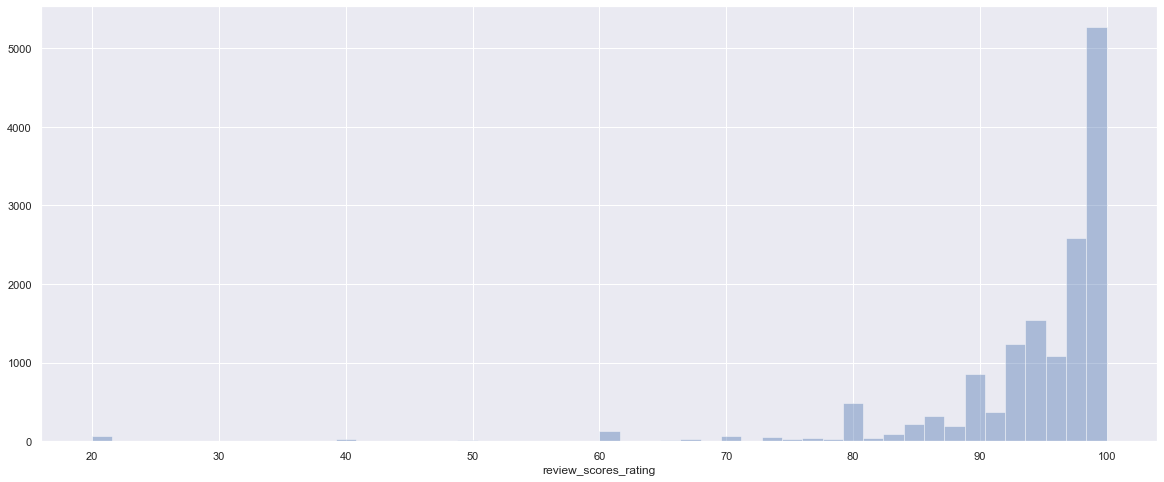

In [73]:
sns.distplot(listings_new['review_scores_rating'], kde=False)
plt.show()

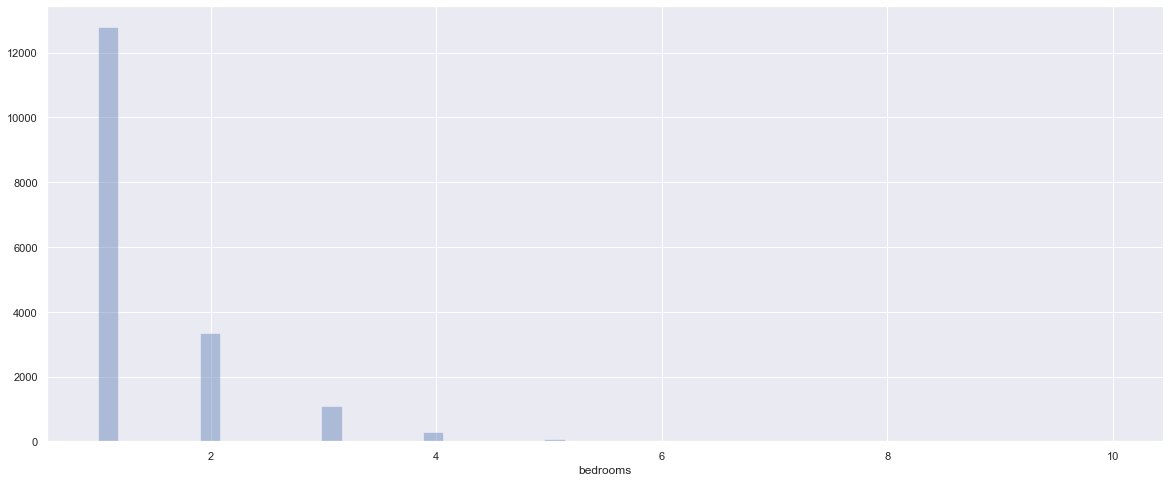

In [74]:
sns.distplot(listings_new['bedrooms'], kde=False)
plt.show()

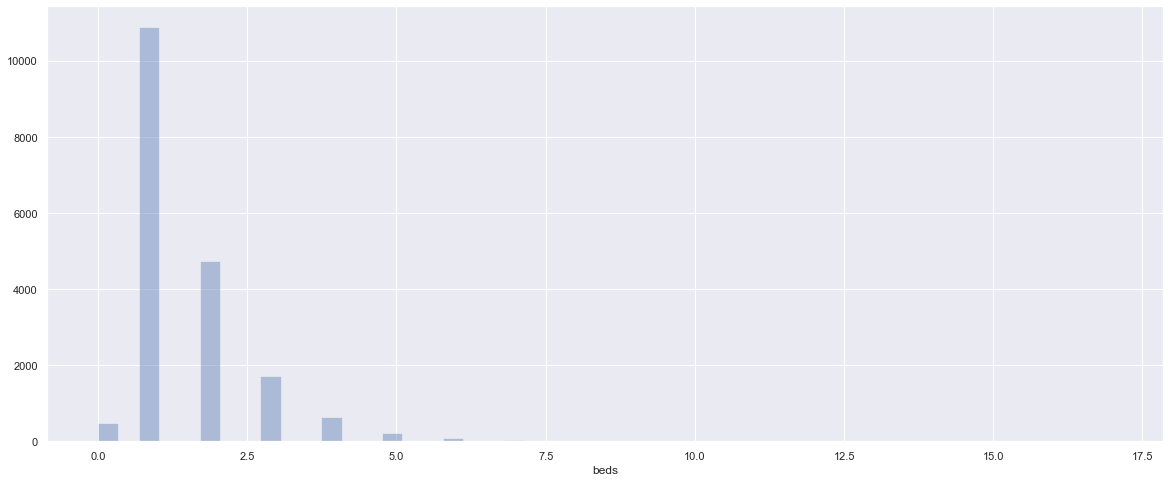

In [75]:
sns.distplot(listings_new['beds'], kde=False)
plt.show()

The beds and bedrooms are right Skewed, hence median is a better measure for imputation. Reviews score rating is also safe to use median.

In [76]:
# Fill in missing values with median in respective columns as the data is right Skewed
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

**Processing and adding categorical features**

In [77]:
# Concatentate room type and covert to numerical variable 
for cat_feature in ['room_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(df_list[cat_feature])], axis=1)

Add Term document matrices that we created earlier from amenities feature.

In [78]:
# Join df_amentities with listings_new
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

In [79]:
listings_new.head()

,accommodates,beds,availability_30,number_of_reviews,review_scores_rating,bedrooms,price,Entire home/apt,Hotel room,Private room,...,private entrance,shampoo,shower gel,smart lock,smoke alarm,stove,tv,washer,wifi,window guards
0,10,7.0,0,7,100.0,5.0,469.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1.0,30,169,97.0,1.0,99.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1.0,0,0,97.0,1.0,66.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,0,217,95.0,1.0,70.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,2.0,23,40,95.0,1.0,135.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Section 4: Modeling**

Data pre-processing and feature engineering done!

Now that we converted all the variables to numerical values, let's make our training and testing data sets.

**Random Forest Regressor**

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [84]:
# Apply RandomForestRegressor algorithm
X = listings_new.drop('price', axis =1)
y = listings_new['price']

# Split X and y train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)

rf.fit(X_train, y_train) # Fit
y_train_pred = rf.predict(X_train) # Predict
y_test_pred = rf.predict(X_test)

r2_score = metrics.r2_score(y_test, y_test_pred)

print('R^2 test: %.4f' % r2_score)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2 test: 0.4195
Mean Absolute Error: 45.0225617725717
Mean Squared Error: 4663.535359617245
Root Mean Squared Error: 68.29008243967235


In [85]:
# Features vs coefs
coefs_df = pd.DataFrame()
coefs_df['Features'] = X_train.columns
coefs_df['Importance'] = rf.feature_importances_
coefs_df.sort_values('Importance', ascending=False).head(20)

,Features,Importance
5,bedrooms,0.251205
6,Entire home/apt,0.083358
0,accommodates,0.069480
3,number_of_reviews,0.058593
2,availability_30,0.053732
4,review_scores_rating,0.040767
1,beds,0.022634
47,free parking on premises,0.010160
44,fire extinguisher,0.009961
46,first aid kit,0.009868


The data shows the features that has the most influence on the price listing are bedrooms, followed by Entire home/apt, then accommodates.

In [86]:
# Actual vs Predict price
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df.head(15)

,Actual,Predicted
3719,150.0,150.27176
4865,40.0,54.44542
5100,114.0,95.50228
12202,120.0,100.94426
4057,170.0,118.21746
10817,155.0,112.74400
11622,95.0,67.93828
13225,174.0,122.38568
10020,46.0,76.40058
15641,163.0,128.95888


Text(0, 0.5, 'Predicted')

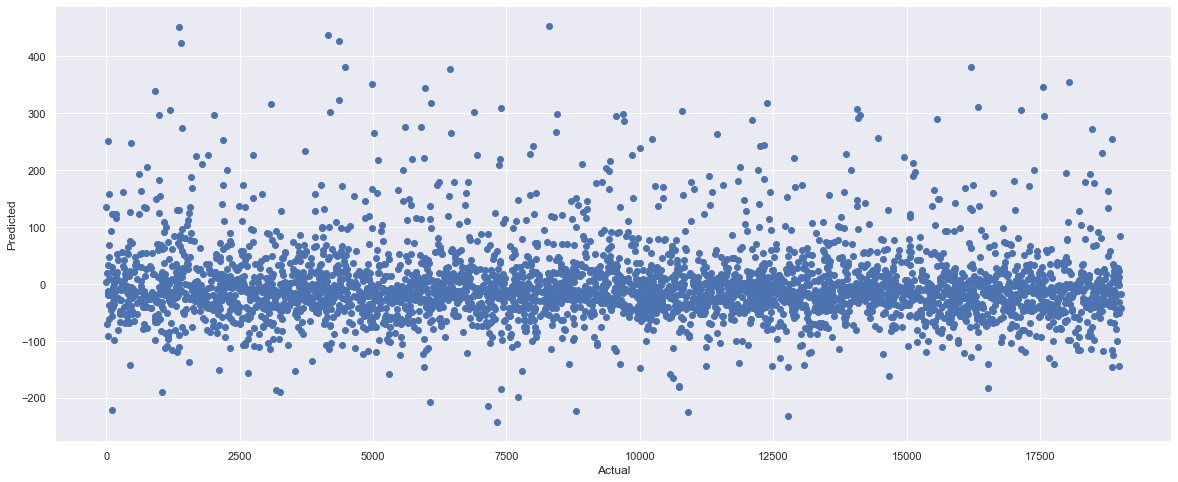

In [87]:
# linestyle graph of Actual vs. Predicted Values
g=plt.plot(y_test - y_test_pred,marker='o',linestyle='')
plt.xlabel('Actual')
plt.ylabel('Predicted')

**Decision Tree Regressor**

In [88]:
# Decision Tree Regressor Model
X = listings_new[['accommodates','beds','availability_30','number_of_reviews','review_scores_rating', 'bedrooms','price','Entire home/apt','Hotel room','Private room','wifi']]
y = listings_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

print('R^2 test:', metrics.r2_score(y_test, y_test_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


R^2 test: 0.9999898112177972
Mean Absolute Error: 0.027787586944890332
Mean Squared Error: 0.08185551096843241
Root Mean Squared Error: 0.2861040212377876


In [89]:
# actual vs predicted for decision tree regressor
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df.head(15)

,Actual,Predicted
3719,150.0,150.0
4865,40.0,40.0
5100,114.0,114.0
12202,120.0,120.0
4057,170.0,170.0
10817,155.0,155.0
11622,95.0,95.0
13225,174.0,174.0
10020,46.0,46.0
15641,163.0,163.0


**Linear Regression**

In [ ]:
X = listings_new[['accommodates','beds','availability_30','number_of_reviews','review_scores_rating', 'bedrooms','price','Entire home/apt','Hotel room','Private room','wifi']]
y = listings_new['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

#Linear Regression
from sklearn import metrics
lm_mse = metrics.mean_squared_error(y_test, lm.predict(X_test))
lm_mse = np.sqrt(lm_mse)

r2_score = metrics.r2_score(y_test, y_test_pred)

print('R^2 test: %.4f' % r2_score)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In [ ]:
# Actual vs Predict price
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df

In [ ]:
# Scatter plot of Actual vs Predicted values
g=plt.scatter(y_test, y_test_pred)
g.axes.set_title('Actual vs Predicted Values')
g.axes.set_xlabel('Actual')
g.axes.set_ylabel('Predicted')

In [ ]:
# linestyle graph of Actual vs. Predicted Values
g=plt.plot(y_test - y_test_pred,marker='o',linestyle='')
plt.xlabel('Actual')
plt.ylabel('Predicted')

**Section 5: Evaluate the Results**

**Business Questions**

1. What are the most common amenities in the dataset?

Based on the findings earlier, the most common amenities in Toronto listings are:

- Wifi
- Heating
- Smoke Alarm
- Essentials
- Kitchen

2. Which neighborhoods have the highest number of listings and rating review scores?

- Waterfront Communities-The Island has the most listings, followed by Niagara, and then Annex. 

- Forest Hill South, Ionview, and High Park-Swansea have the highest review score ratings.

3. What is the relationship between the type of room and price listing?
- Entire home/apt has the highest median price compared to the other room type listing. Shared room is at the lowest median.

4. What are the most influential features of the dataset to predict the price of a listing?

- The features that has the most influence on the price listing are bedrooms, followed by Entire home/apt, then accommodates.